In [1]:
#Importing the Libraries
import numpy as np #for numeric operations on data
import pandas as pd #for data manipulation operations
import matplotlib.pyplot as plt #for data visualization operations
import seaborn as sns #for data visualization operations
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
data=pd.read_csv("C:/Users/Phani/Downloads/water_potability.csv")
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,12.000000,212.670000,9090.55000,6.895000,323.900500,424.987890,15.576700,65.789000,3.567000,0
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [34]:
df=data.query('ph>=5 and Potability==1').min()
df

ph                 5.023381
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.000000
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.000000
Turbidity          0.000000
Potability         1.000000
dtype: float64

In [4]:
# First 5 rows of the dataset
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
#Number of Rows and Columns in the Dataset
data.shape

(3276, 10)

## Data Cleaning

In [6]:
#Information about the dataset on columnwise
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2788 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2499 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
#Checking null values in columns 
data.isnull().sum()

ph                 488
Hardness             0
Solids               0
Chloramines          0
Sulfate            777
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
#Average of the all columns
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2788.000000,3276.000000,3276.000000,3276.000000,2499.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.074960,196.002913,21955.303100,7.110174,332.942186,425.400772,14.261477,66.261212,3.959604,0.388584
std,1.608026,33.880726,8800.126734,1.609754,44.474580,82.598615,3.359701,16.409763,0.796366,0.487503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.089870,176.778006,15616.384067,6.124963,307.592458,365.488164,12.060510,55.776857,3.438836,0.000000
50%,7.034491,196.895580,20890.593525,7.125522,333.027205,421.644860,14.215791,66.593093,3.954025,0.000000
75%,8.060974,216.628561,27310.587733,8.112651,359.762109,481.545011,16.553701,77.320572,4.498718,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
data.fillna(data.mean(),inplace=True)

In [10]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.074960,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,332.942186,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,332.942186,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,332.942186,392.449580,19.903225,66.261212,2.798243,1
3273,12.000000,212.670000,9090.55000,6.895000,323.900500,424.987890,15.576700,65.789000,3.567000,0
3274,5.126763,230.603758,11983.86938,6.303357,332.942186,402.883113,11.168946,77.488213,4.708658,1


In [11]:
#Checking null values in the columns
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [14]:
data.Potability.value_counts()

0    2003
1    1273
Name: Potability, dtype: int64

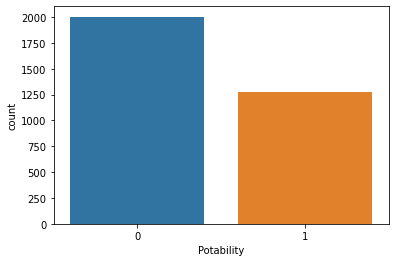

In [15]:
#Graphical representation of Water Potability
sns.countplot(data['Potability'])
plt.show()

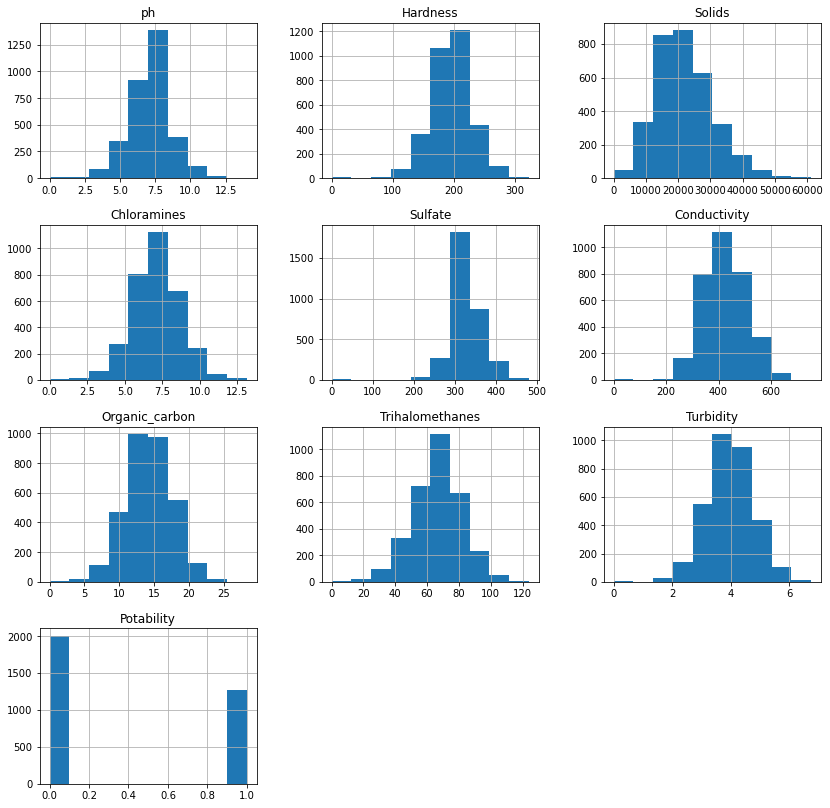

In [16]:
#How the DATA is Disturuted shown in graphical representation
data.hist(figsize=(14,14))
plt.show()

# Partitioning

In [18]:
#Input Variable
X = data.drop('Potability',axis=1)
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.074960,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.05786,6.635246,332.942186,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,332.942186,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.80216,8.061362,332.942186,392.449580,19.903225,66.261212,2.798243
3273,12.000000,212.670000,9090.55000,6.895000,323.900500,424.987890,15.576700,65.789000,3.567000
3274,5.126763,230.603758,11983.86938,6.303357,332.942186,402.883113,11.168946,77.488213,4.708658


In [19]:
data["ph"].max()

14.0

In [20]:
#Output Variable
y= data['Potability']
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    0
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [21]:
#Dividing  the data into Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=62,shuffle=True)

In [22]:
y_train.value_counts()

0    1491
1     966
Name: Potability, dtype: int64

In [23]:
y_test.value_counts()

0    512
1    307
Name: Potability, dtype: int64

# Model Building

# Desicion Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [25]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
y_test

1945    1
1294    0
766     1
1531    1
2764    1
       ..
2112    0
2958    0
2937    0
2573    0
1940    1
Name: Potability, Length: 819, dtype: int64

In [27]:
y_pred=dt.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_dt=accuracy_score(y_test,y_pred)
accuracy_dt

0.5934065934065934

In [29]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.593


In [30]:
confusion_matrix(y_pred,y_test)

array([[331, 152],
       [181, 155]], dtype=int64)

###### Prediction random values

In [31]:
X_DTs=dt.predict([[6.9555,0,0,0,0,0,0,0,0,]])
X_DTs

array([1], dtype=int64)

In [32]:
 X_DTs=dt.predict([[6.9555,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970 ,2.963135]])
X_DTs

array([0], dtype=int64)

In [33]:
 X_DTs=dt.predict([[7.808856,193.553212 ,17329.80216,8.061362,332.942186,392.449580,19.903225,66.261212,2.798243]])
X_DTs

array([1], dtype=int64)